<a href="https://colab.research.google.com/github/NehaSontakk/KEGG_GRAPH/blob/main/KEGG_KO_Adjacency_Matrix_Iteration1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bioservices
!apt-get install graphviz libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from bioservices import KEGG
import networkx as nx
import matplotlib.pyplot as plt
import re
import pandas as pd

In [ ]:
module_id = "M00023"

In [ ]:
def fetch_and_plot_reactions(module_id):
    kegg = KEGG()
    try:
        module_info = kegg.get(module_id)
        print(module_info)
        module_parsed = kegg.parse(module_info)
        print(module_parsed)
    except Exception as e:
        print(f"Failed to retrieve or parse module: {e}")
        return None

    reactions = module_parsed.get("REACTION", {})
    orthology = module_parsed.get("ORTHOLOGY", {})
    compounds = module_parsed.get("COMPOUND",{})
    definition = module_parsed.get("DEFINITION",{})
    if not reactions:
        print("No reactions found in the module.")
        return None

    return reactions,orthology,compounds,definition

In [ ]:
reactions,orthology,compounds,definition = fetch_and_plot_reactions(module_id)
fetch_and_plot_reactions(module_id)

ENTRY       M00023            Pathway   Module
NAME        Tryptophan biosynthesis, chorismate => tryptophan
DEFINITION  (((K01657+K01658,K13503,K13501,K01656) K00766),K13497) (((K01817,K24017) (K01656,K01609)),K13498,K13501) (K01695+(K01696,K06001),K01694)
ORTHOLOGY   K01657,K01658,K13497,K13503,K13501,K01656  anthranilate synthase [EC:4.1.3.27] [RN:R00985 R00986]
            K00766,K13497  anthranilate phosphoribosyltransferase [EC:2.4.2.18] [RN:R01073]
            K01817,K24017,K13498,K13501  phosphoribosylanthranilate isomerase [EC:5.3.1.24] [RN:R03509]
            K01609,K13498,K13501,K01656  indole-3-glycerol phosphate synthase [EC:4.1.1.48] [RN:R03508]
            K01695,K01696,K06001,K01694  tryptophan synthase [EC:4.2.1.20] [RN:R02722]
CLASS       Pathway modules; Amino acid metabolism; Aromatic amino acid metabolism
PATHWAY     map00400  Phenylalanine, tyrosine and tryptophan biosynthesis
            map01230  Biosynthesis of amino acids
            map01100  Metabolic pathwa

({'R00985,R00986': 'C00251 -> C00108',
  'R01073': 'C00108 -> C04302',
  'R03509': 'C04302 -> C01302',
  'R03508': 'C01302 -> C03506',
  'R02722': 'C03506 -> C00078'},
 {'K01657,K01658,K13497,K13503,K13501,K01656': 'anthranilate synthase [EC:4.1.3.27] [RN:R00985 R00986]',
  'K00766,K13497': 'anthranilate phosphoribosyltransferase [EC:2.4.2.18] [RN:R01073]',
  'K01817,K24017,K13498,K13501': 'phosphoribosylanthranilate isomerase [EC:5.3.1.24] [RN:R03509]',
  'K01609,K13498,K13501,K01656': 'indole-3-glycerol phosphate synthase [EC:4.1.1.48] [RN:R03508]',
  'K01695,K01696,K06001,K01694': 'tryptophan synthase [EC:4.2.1.20] [RN:R02722]'},
 {'C00251': 'Chorismate',
  'C00108': 'Anthranilate',
  'C04302': 'N-(5-Phospho-D-ribosyl)anthranilate',
  'C01302': "1-(2-Carboxyphenylamino)-1'-deoxy-D-ribulose 5'-phosphate",
  'C03506': 'Indoleglycerol phosphate',
  'C00078': 'L-Tryptophan'},
 '(((K01657+K01658,K13503,K13501,K01656) K00766),K13497) (((K01817,K24017) (K01656,K01609)),K13498,K13501) (K016

In [ ]:
reactions

{'R00985,R00986': 'C00251 -> C00108',
 'R01073': 'C00108 -> C04302',
 'R03509': 'C04302 -> C01302',
 'R03508': 'C01302 -> C03506',
 'R02722': 'C03506 -> C00078'}

In [ ]:
orthology

{'K01657,K01658,K13497,K13503,K13501,K01656': 'anthranilate synthase [EC:4.1.3.27] [RN:R00985 R00986]',
 'K00766,K13497': 'anthranilate phosphoribosyltransferase [EC:2.4.2.18] [RN:R01073]',
 'K01817,K24017,K13498,K13501': 'phosphoribosylanthranilate isomerase [EC:5.3.1.24] [RN:R03509]',
 'K01609,K13498,K13501,K01656': 'indole-3-glycerol phosphate synthase [EC:4.1.1.48] [RN:R03508]',
 'K01695,K01696,K06001,K01694': 'tryptophan synthase [EC:4.2.1.20] [RN:R02722]'}

In [ ]:
compounds

{'C00251': 'Chorismate',
 'C00108': 'Anthranilate',
 'C04302': 'N-(5-Phospho-D-ribosyl)anthranilate',
 'C01302': "1-(2-Carboxyphenylamino)-1'-deoxy-D-ribulose 5'-phosphate",
 'C03506': 'Indoleglycerol phosphate',
 'C00078': 'L-Tryptophan'}

In [ ]:
def create_compound_adjacency_matrix(compounds, reactions):
    """
    Creates an adjacency matrix for an undirected graph based on given reactions.

    Parameters:
        compounds (dict): A dictionary of compound identifiers and names.
        reactions (dict): A dictionary where keys are reaction identifiers and
                          values are strings in the format 'compound1 -> compound2'.

    Returns:
        tuple: A tuple containing the adjacency matrix and a list of compound identifiers.
    """
    compound_list = list(compounds.keys())
    n = len(compound_list)
    compound_adjacency_matrix = [[0] * n for _ in range(n)]
    compound_index = {compound: idx for idx, compound in enumerate(compound_list)}

    for reaction in reactions.values():
        source, target = reaction.split(' -> ')
        s_idx = compound_index[source]
        t_idx = compound_index[target]
        compound_adjacency_matrix[s_idx][t_idx] = 1
        #compound_adjacency_matrix[t_idx][s_idx] = 1

    return compound_adjacency_matrix, compound_list


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(adjacency_matrix, compound_list):
    """
    Plots a directed graph from an adjacency matrix and a list of compounds.

    Parameters:
        adjacency_matrix (list): A 2D list representing the adjacency matrix of the graph.
        compound_list (list): A list of compound identifiers corresponding to the matrix indices.
    """
    G = nx.DiGraph()  # Using DiGraph to create a directed graph
    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] == 1:
                G.add_edge(compound_list[i], compound_list[j])  # Add directed edge

    plt.figure(figsize=(8, 6))
    # Using the 'draw_networkx' function to customize arrow properties
    pos = nx.spring_layout(G)  # Defines a layout for nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
    nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')  # Draw edges with arrows

    plt.title("Directed Graph Visualization")
    plt.axis('off')  # Turn off the axis
    plt.show()



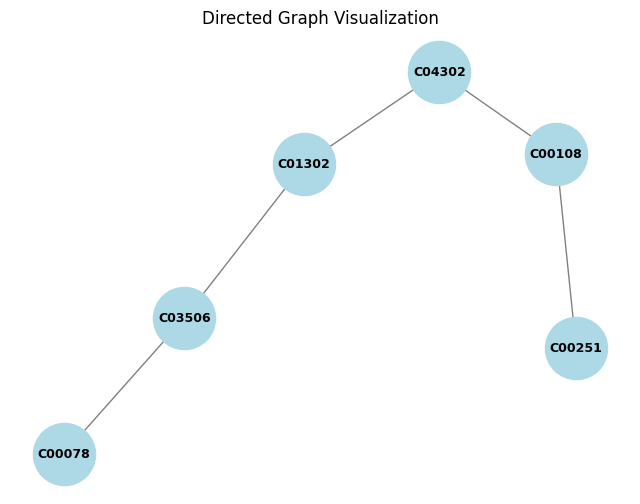

In [ ]:
# Create adjacency matrix
adjacency_matrix, compound_list = create_compound_adjacency_matrix(compounds, reactions)

# Plot the graph
plot_graph(adjacency_matrix, compound_list)

In [ ]:
adjacency_matrix

[[0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0]]

In [ ]:
#Create a reaction matrix based on the compounds

In [ ]:

def create_reaction_adjacency_matrix_with_sources_and_sinks(reaction_dict):
    # Step 1: Map reactions to compounds and reverse
    reaction_to_compounds = {}
    compound_to_reactions = {}
    for reaction_group, compounds in reaction_dict.items():
        reactions = reaction_group.split(',')
        source, target = compounds.split(' -> ')
        for reaction in reactions:
            reaction_to_compounds[reaction] = {'source': source, 'target': target}
            if source not in compound_to_reactions:
                compound_to_reactions[source] = []
            if target not in compound_to_reactions:
                compound_to_reactions[target] = []
            compound_to_reactions[source].append(reaction)
            compound_to_reactions[target].append(reaction)

    # Identify source and sink compounds
    all_sources = set(compound for compound, reactions in compound_to_reactions.items() if all('source' in reaction_to_compounds[r] and reaction_to_compounds[r]['source'] == compound for r in reactions))
    all_sinks = set(compound for compound, reactions in compound_to_reactions.items() if all('target' in reaction_to_compounds[r] and reaction_to_compounds[r]['target'] == compound for r in reactions))

    # Create a list of all reactions and add source and sink nodes
    reaction_list = list(reaction_to_compounds.keys()) + ['source', 'sink']
    n = len(reaction_list)
    adjacency_matrix = [[0] * n for _ in range(n)]

    # Fill the adjacency matrix for reactions
    for i in range(n - 2):  # exclude source and sink
        for j in range(i + 1, n - 2):  # exclude source and sink
            if reaction_to_compounds[reaction_list[i]]['target'] == reaction_to_compounds[reaction_list[j]]['source'] or reaction_to_compounds[reaction_list[j]]['target'] == reaction_to_compounds[reaction_list[i]]['source']:
                adjacency_matrix[i][j] = 1
                adjacency_matrix[j][i] = 1

    # Connect source and sink nodes
    source_index = reaction_list.index('source')
    sink_index = reaction_list.index('sink')
    for i in range(n - 2):  # exclude source and sink themselves
        if reaction_to_compounds[reaction_list[i]]['source'] in all_sources:
            adjacency_matrix[source_index][i] = 1
        if reaction_to_compounds[reaction_list[i]]['target'] in all_sinks:
            adjacency_matrix[i][sink_index] = 1

    return adjacency_matrix, reaction_list

reaction_adjacency_matrix, reaction_list = create_reaction_adjacency_matrix_with_sources_and_sinks(reactions)

# Print the adjacency matrix
for row in reaction_adjacency_matrix:
    print(row)

# Print the reaction list for reference
print("Reactions:", reaction_list)


[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
Reactions: ['R00985', 'R00986', 'R01073', 'R03509', 'R03508', 'R02722', 'source', 'sink']


In [ ]:
list(enumerate(reaction_list))

[(0, 'R00985'),
 (1, 'R00986'),
 (2, 'R01073'),
 (3, 'R03509'),
 (4, 'R03508'),
 (5, 'R02722'),
 (6, 'source'),
 (7, 'sink')]

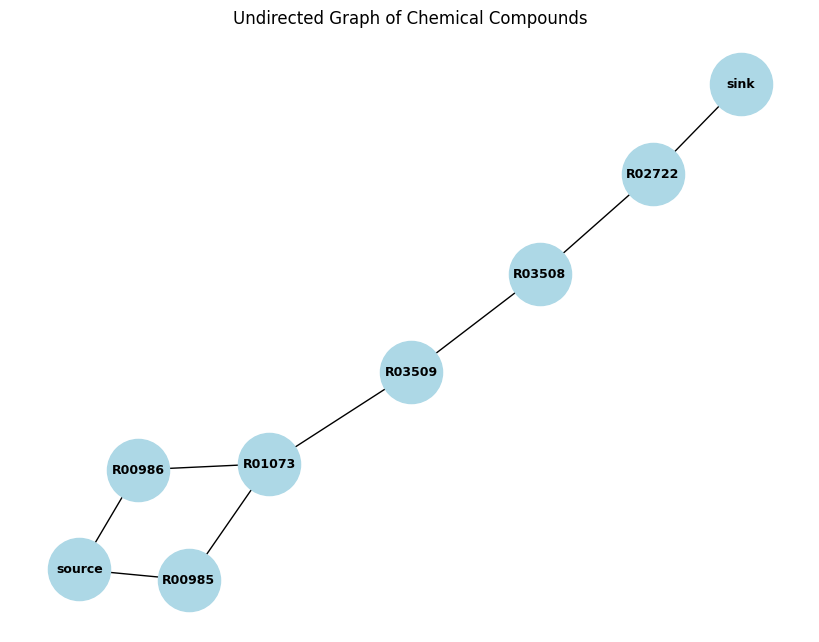

In [ ]:
plot_graph(reaction_adjacency_matrix, reaction_list)

In [ ]:
import sympy as sp

def translate_expression(expression):
    # Replace + with * first for strong AND binding
    expression = expression.replace('+', '*')
    # Convert spaces to commas for easier handling of OR
    expression = re.sub(r'\s+', ',', expression)
    print("After converting spaces to commas:", expression)
    # Replace commas with + for addition
    expression = expression.replace(',', '+')
    print("After replacing commas with +:", expression)
    return expression

def evaluate_expression(expression):
    # Translate the expression to algebraic form
    algebraic_expression = translate_expression(expression)

    # Use sympy to expand the expression
    try:
        expanded_expr = sp.expand(algebraic_expression)
        new_expr = sp.Add()  # Start with an additive identity element (zero)
        for term in expanded_expr.args:
            if term.is_Mul and any(arg.is_Number for arg in term.args):
                # If the term is a multiplication and has a number, remove the number
                filtered_term = sp.Mul(*[arg for arg in term.args if not arg.is_Number])
                new_expr += filtered_term
            elif term.is_Number:
                # If the term is a number, do not add it to the new expression
                continue
            else:
                # Otherwise, just add the term as it is
                new_expr += term

    except sp.SympifyError as e:
        return f"Error in expanding: {str(e)}"
    return new_expr

# Example expression
expression = definition

# Evaluate the expression
evaluated_expression = evaluate_expression(expression)
print("Final expanded expression:", evaluated_expression)


After converting spaces to commas: (((K01657*K01658,K13503,K13501,K01656),K00766),K13497),(((K01817,K24017),(K01656,K01609)),K13498,K13501),(K01695*(K01696,K06001),K01694)
After replacing commas with +: (((K01657*K01658+K13503+K13501+K01656)+K00766)+K13497)+(((K01817+K24017)+(K01656+K01609))+K13498+K13501)+(K01695*(K01696+K06001)+K01694)
Final expanded expression: K00766 + K01609 + K01656 + K01657*K01658 + K01694 + K01695*K01696 + K01695*K06001 + K01817 + K13497 + K13498 + K13501 + K13503 + K24017


In [ ]:
entities = str(evaluated_expression).split(" + ")

In [ ]:
def split_reactions(reaction_str):
    # Assuming each reaction code starts with 'R' followed by exactly 5 digits
    return [reaction_str[i:i+6] for i in range(0, len(reaction_str), 6)]

def process_orthology_to_reactions(orthology):
    # Dictionary to store the final mapping of KO identifiers to reaction lists
    ko_to_reaction_str = {}

    # Loop through the orthology dictionary
    for ko_keys, description in orthology.items():
        # Extracting reaction numbers from the description
        reaction_numbers = description.split('[RN:')[1].strip(']').replace(' ', '')

        # Split the reaction string into a list
        reactions_list = split_reactions(reaction_numbers)

        # Convert KO keys string to a tuple
        ko_tuple = tuple(ko_keys.split(','))

        # Populate the new dictionary
        ko_to_reaction_str[ko_tuple] = reactions_list

    return ko_to_reaction_str

processed_data = process_orthology_to_reactions(orthology)

# Display the converted dictionary to verify its content
for key, value in processed_data.items():
    print(f"KO Identifiers: {key}, Reactions: {value}")


KO Identifiers: ('K01657', 'K01658', 'K13497', 'K13503', 'K13501', 'K01656'), Reactions: ['R00985', 'R00986']
KO Identifiers: ('K00766', 'K13497'), Reactions: ['R01073']
KO Identifiers: ('K01817', 'K24017', 'K13498', 'K13501'), Reactions: ['R03509']
KO Identifiers: ('K01609', 'K13498', 'K13501', 'K01656'), Reactions: ['R03508']
KO Identifiers: ('K01695', 'K01696', 'K06001', 'K01694'), Reactions: ['R02722']


In [ ]:
# Function to generate a reaction to entity mapping
def generate_reaction_entity_map(ko_to_reactions, entities):
    reaction_to_entities = {}
    for ko_keys, reactions in ko_to_reactions.items():
        for reaction in reactions:
            if reaction not in reaction_to_entities:
                reaction_to_entities[reaction] = set()

            for entity in entities:
                # Direct match case (single KOs in entities list)
                for ko_key in ko_keys:
                    if ko_key in entity:
                        reaction_to_entities[reaction].add(entity)
                        break

                # Combined match case (e.g., 'K01657*K01658')
                if '*' in entity:
                    combined_keys = entity.split('*')
                    if all(key in ko_keys for key in combined_keys):
                        reaction_to_entities[reaction].add(entity)

    return reaction_to_entities

reaction_entity_map = generate_reaction_entity_map(processed_data, entities)

for reaction, ent_set in reaction_entity_map.items():
    print(f"Reaction: {reaction}, Entities involved: {sorted(ent_set)}")


Reaction: R00985, Entities involved: ['K01656', 'K01657*K01658', 'K13497', 'K13501', 'K13503']
Reaction: R00986, Entities involved: ['K01656', 'K01657*K01658', 'K13497', 'K13501', 'K13503']
Reaction: R01073, Entities involved: ['K00766', 'K13497']
Reaction: R03509, Entities involved: ['K01817', 'K13498', 'K13501', 'K24017']
Reaction: R03508, Entities involved: ['K01609', 'K01656', 'K13498', 'K13501']
Reaction: R02722, Entities involved: ['K01694', 'K01695*K01696', 'K01695*K06001']


In [ ]:
reaction_entity_map

{'R00985': {'K01656', 'K01657*K01658', 'K13497', 'K13501', 'K13503'},
 'R00986': {'K01656', 'K01657*K01658', 'K13497', 'K13501', 'K13503'},
 'R01073': {'K00766', 'K13497'},
 'R03509': {'K01817', 'K13498', 'K13501', 'K24017'},
 'R03508': {'K01609', 'K01656', 'K13498', 'K13501'},
 'R02722': {'K01694', 'K01695*K01696', 'K01695*K06001'}}

In [ ]:
entities

['K00766',
 'K01609',
 'K01656',
 'K01657*K01658',
 'K01694',
 'K01695*K01696',
 'K01695*K06001',
 'K01817',
 'K13497',
 'K13498',
 'K13501',
 'K13503',
 'K24017']

In [ ]:
# Assuming reaction_adjacency_matrix is already defined
# Remove the last two rows
trimmed_matrix = reaction_adjacency_matrix[:-2]

# Remove the last two columns from each remaining row
trimmed_matrix = [row[:-2] for row in trimmed_matrix]

# Print the trimmed adjacency matrix
for row in trimmed_matrix:
    print(row)

[0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
[1, 1, 0, 1, 0, 0]
[0, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 0]


In [ ]:
reaction_list[:-2]

['R00985', 'R00986', 'R01073', 'R03509', 'R03508', 'R02722']

In [ ]:

import numpy as np
# Initialize an empty dictionary for entity adjacency
entity_adjacency = {}

# Populate the adjacency dictionary
for i, rxn1 in enumerate(reaction_list[:-2]):
    for j, rxn2 in enumerate(reaction_list[:-2]):
        if trimmed_matrix[i][j] == 1:  # There's a connection between rxn1 and rxn2
            for entity1 in reaction_entity_map[rxn1]:
                for entity2 in reaction_entity_map[rxn2]:
                    if entity1 != entity2:  # Exclude self-edges
                        if entity1 not in entity_adjacency:
                            entity_adjacency[entity1] = set()
                        entity_adjacency[entity1].add(entity2)

# Output the entity adjacency matrix
for entity, adjacencies in entity_adjacency.items():
    print(f"Entity {entity} has connections to: {sorted(adjacencies)}")


Entity K13503 has connections to: ['K00766', 'K13497']
Entity K13501 has connections to: ['K00766', 'K01609', 'K01656', 'K01694', 'K01695*K01696', 'K01695*K06001', 'K01817', 'K13497', 'K13498', 'K24017']
Entity K01656 has connections to: ['K00766', 'K01694', 'K01695*K01696', 'K01695*K06001', 'K01817', 'K13497', 'K13498', 'K13501', 'K24017']
Entity K13497 has connections to: ['K00766', 'K01656', 'K01657*K01658', 'K01817', 'K13498', 'K13501', 'K13503', 'K24017']
Entity K01657*K01658 has connections to: ['K00766', 'K13497']
Entity K00766 has connections to: ['K01656', 'K01657*K01658', 'K01817', 'K13497', 'K13498', 'K13501', 'K13503', 'K24017']
Entity K13498 has connections to: ['K00766', 'K01609', 'K01656', 'K01694', 'K01695*K01696', 'K01695*K06001', 'K01817', 'K13497', 'K13501', 'K24017']
Entity K01817 has connections to: ['K00766', 'K01609', 'K01656', 'K13497', 'K13498', 'K13501']
Entity K24017 has connections to: ['K00766', 'K01609', 'K01656', 'K13497', 'K13498', 'K13501']
Entity K0160

In [ ]:
enumerate(reactions)

In [ ]:

all_entities = set()
for entities in reaction_entity_map.values():
    all_entities.update(entities)

# Mapping entities to indices for matrix representation
entity_index = {entity: idx for idx, entity in enumerate(sorted(all_entities))}

# Initialize the one-hot encoded adjacency matrix
entity_adjacency_matrix = np.zeros((len(all_entities), len(all_entities)), dtype=int)

# Populate the adjacency matrix
for i, rxn1 in enumerate(reaction_list[:-2]):
    for j, rxn2 in enumerate(reaction_list[:-2]):
        if i != j and trimmed_matrix[i][j] == 1:
            shared_entities = reaction_entity_map[rxn1].intersection(reaction_entity_map[rxn2])
            for entity1 in reaction_entity_map[rxn1]:
                for entity2 in reaction_entity_map[rxn2]:
                    if entity1 != entity2 and entity2 not in shared_entities:
                        idx1 = entity_index[entity1]
                        idx2 = entity_index[entity2]
                        entity_adjacency_matrix[idx1][idx2] = 1

# Print the one-hot encoded adjacency matrix
print("One-Hot Encoded Entity Adjacency Matrix:")
print(entity_adjacency_matrix)
print("\nEntity Index Mapping:")
for entity, idx in sorted(entity_index.items(), key=lambda item: item[1]):
    print(f"Index {idx}: {entity}")


One-Hot Encoded Entity Adjacency Matrix:
[[0 0 1 1 0 0 0 1 0 1 1 1 1]
 [0 0 0 0 1 1 1 1 0 0 0 0 1]
 [1 0 0 0 1 1 1 1 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 1 1 0 0]
 [0 1 1 0 0 0 0 0 0 1 1 0 0]
 [0 1 1 0 0 0 0 0 0 1 1 0 0]
 [1 1 1 0 0 0 0 0 1 0 0 0 0]
 [1 0 1 1 0 0 0 1 0 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 0 0 0 1]
 [1 1 1 0 1 1 1 1 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 0 0 0 0]]

Entity Index Mapping:
Index 0: K00766
Index 1: K01609
Index 2: K01656
Index 3: K01657*K01658
Index 4: K01694
Index 5: K01695*K01696
Index 6: K01695*K06001
Index 7: K01817
Index 8: K13497
Index 9: K13498
Index 10: K13501
Index 11: K13503
Index 12: K24017


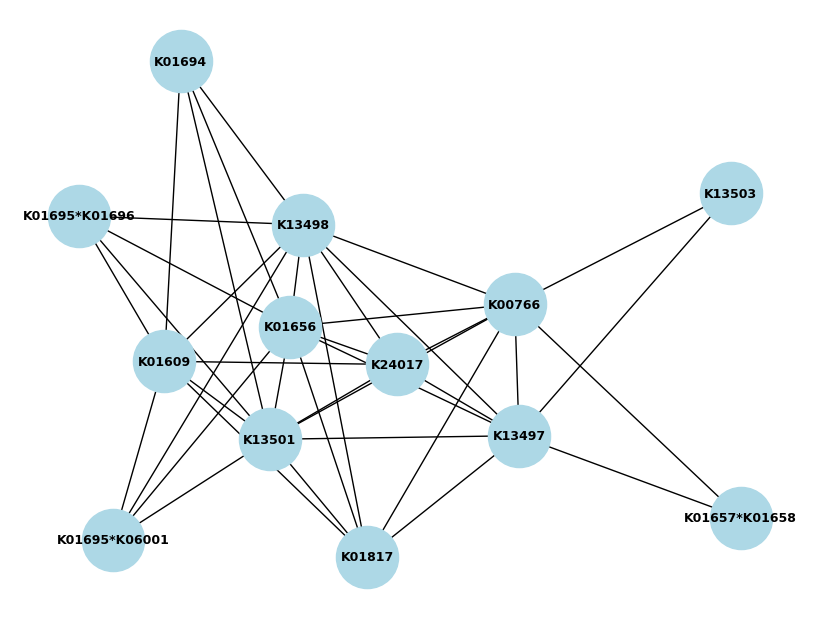

In [ ]:
plot_graph(entity_adjacency_matrix, list(entity_index))